In [2]:
import matplotlib_fontja  # 日本語フォントの表示崩れを防ぐ（別途インストール必要

# 2. 確率論の基礎

## 2.1 確率の公理、事象・標本空間

確率論は不確実性を数学的に扱うための理論体系だ。日常生活でも「明日雨が降る確率は30%」「このくじの当選確率は0.01%」など、確率という概念は広く使われている。この章では確率論の基礎となる概念を学ぶ。

### 標本空間と事象

確率を厳密に定義するには、まず「標本空間」と「事象」という概念を理解する必要がある。

- **標本空間（Sample Space）**: 実験や観測によって生じうる全ての結果（根元事象）の集合
- **事象（Event）**: 標本空間の部分集合

例えば、サイコロを1回振る実験を考えよう：
- 標本空間 $S = \{1, 2, 3, 4, 5, 6\}$
- 「偶数の目が出る」という事象 $A = \{2, 4, 6\}$
- 「3より大きい目が出る」という事象 $B = \{4, 5, 6\}$

### 事象の演算

事象は集合なので、集合演算を適用できる：

- **和集合（Union）**: $A \cup B$ は「事象$A$または事象$B$が起こる」ことを表す
- **積集合（Intersection）**: $A \cap B$ は「事象$A$と事象$B$が同時に起こる」ことを表す
- **補集合（Complement）**: $A^c$ は「事象$A$が起こらない」ことを表す

先ほどの例で考えると：
- $A \cup B = \{2, 4, 5, 6\}$ （偶数の目、または3より大きい目が出る）
- $A \cap B = \{4, 6\}$ （偶数かつ3より大きい目が出る）
- $A^c = \{1, 3, 5\}$ （偶数の目が出ない = 奇数の目が出る）

### 確率の公理

確率とは、標本空間$S$の各事象$A$に対して、実数値$P(A)$を対応させる関数で、以下の3つの公理（コルモゴロフの公理）を満たすものと定義される：

1. **非負性**: すべての事象$A$に対して、$P(A) \geq 0$
2. **正規性**: 標本空間全体の確率は1、つまり$P(S) = 1$
3. **加法性**: 互いに排反な事象（共通部分を持たない事象）$A_1, A_2, \ldots$に対して、
   $P(A_1 \cup A_2 \cup \ldots) = P(A_1) + P(A_2) + \ldots$

これらの公理から、以下のような確率の基本性質が導かれる：

- 空集合の確率は0: $P(\emptyset) = 0$
- 補事象の確率: $P(A^c) = 1 - P(A)$
- 確率の上限: $0 \leq P(A) \leq 1$
- 包含-排除の原理: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

### 例題: サイコロの確率計算

公正なサイコロを1回振る実験を考える。各目が出る確率は等しく$1/6$である。

問題1: 「4以上の目が出る」確率を求めよ。

解答:
- 事象$A$ = 「4以上の目が出る」 = $\{4, 5, 6\}$
- $P(A) = P(4) + P(5) + P(6) = 1/6 + 1/6 + 1/6 = 3/6 = 1/2$

問題2: 「偶数の目または5以上の目が出る」確率を求めよ。

解答:
- 事象$B$ = 「偶数の目が出る」 = $\{2, 4, 6\}$
- 事象$C$ = 「5以上の目が出る」 = $\{5, 6\}$
- $B \cap C = \{6\}$
- $P(B \cup C) = P(B) + P(C) - P(B \cap C) = 3/6 + 2/6 - 1/6 = 4/6 = 2/3$

### コード例

In [ ]:
# Pythonで確率計算を実装してみよう
import numpy as np
import matplotlib.pyplot as plt

# サイコロを10000回振るシミュレーション
n_trials = 10000
dice_rolls = np.random.randint(1, 7, size=n_trials)

# 「4以上の目が出る」確率
event_A = (dice_rolls >= 4)
print(f"event_A = {event_A}")
# NumPy ライブラリの np.mean 関数を使って event_A 配列の平均値を算出
# event_A は True/False （あるいは 1/0 ）の配列
# np.mean の計算では True は 1、False は 0 として扱われるため、
# 平均値は「事象Aが起きた割合（=確率）」になる
prob_A = np.mean(event_A)

# f-string を使い、変数 prob_A の値を文字列表記へ埋め込む
# {prob_A:.4f} で、小数点以下4桁まで表示する指定
# 理論値（例えばコイン投げなら0.5）も一緒に出力
print(f"P(A) = {prob_A:.4f} (理論値: 0.5000)")

# サイコロの出目（dice_rolls）に対し、「偶数が出る」事象Bをブール値配列で作成
# 各要素が偶数ならTrue, 奇数ならFalseとなる（2, 4, 6 → True）
event_B = (dice_rolls % 2 == 0)  # 偶数

# サイコロの出目が「5以上である」事象Cのブール値配列を作成
# 各要素が5以上（5, 6）ならTrue, それ以外はFalse
event_C = (dice_rolls >= 5)      # 5以上

# 事象「B または C」が起こる場合（和集合 B ∪ C）を求める処理
# event_B, event_Cはいずれも numpy配列で、
# サイコロの各試行ごとに「B（偶数が出る）」または「C（5以上が出る）」が起こったかを
# True（該当）/False（非該当）で表している
#
# np.logical_or(event_B, event_C) は、event_Bとevent_Cの同じインデックス同士に対して
# 「論理和」（どちらかがTrueならTrue、両方FalseならFalse）を要素ごとに計算して新しい配列を作る
# 例：
#   event_B = [True, False, False, True, False, True]   # 2,4,6がTrue（例）
#   event_C = [False, False, False, False, True, True]  # 5,6がTrue（例）
#   event_B_or_C = [True, False, False, True, True, True]
#                     ↑     ↑      ↑      ↑    ↑    ↑
#                    1回目 2回目  3回目  4回目(2) 5回目(3) 6回目(4)
#
# つまり、どちらかの条件を満たすサイコロの出目（例：2,4,5,6など）が True になる
event_B_or_C = np.logical_or(event_B, event_C)

# 和集合「BまたはCが起きる」確率を計算
# event_B_or_C 配列の平均値＝確率となる（True = 1, False = 0）
prob_B_or_C = np.mean(event_B_or_C)

# f-string で小数点以下4桁まで確率を表示
# 理論値（2, 4, 5, 6: 4/6 = 0.6667）と一緒に出力
print(f"P(B ∪ C) = {prob_B_or_C:.4f} (理論値: 0.6667)")

event_A = [ True False False ...  True  True False]
P(A) = 0.5038 (理論値: 0.5000)
P(B ∪ C) = 0.6736 (理論値: 0.6667)


### 古典的確率と一般的な確率

確率の計算方法は大きく分けて2つある：

1. **古典的確率（等確率モデル）**：
   - 標本空間の各根元事象が等しい確率で起こると仮定
     - 「すべての結果が同じくらい起こりやすい」と考える場合に使う考え方です
   - 確率 = 好ましい結果の数 ÷ 可能な結果の総数
     - 確率 = 求めたい事象（条件）に該当する結果の数 ÷ すべての結果の数
   - 例：サイコロで2の目が出る、トランプでハートを引く etc.
     - 例：サイコロなら1〜6の目がそれぞれ同じ確率で出ると仮定して、「偶数が出る確率」などを求める

2. **一般的な確率**：
   - 根元事象の確率が等しいとは限らない
     - それぞれの結果が起こる確率が必ずしも同じとは限らない
       - たとえば、出る目によって確率に差がある場合など
   - 例：歪んだサイコロ、実世界の多くの現象
     - 例：少し重い面があるサイコロや、不公平なゲーム、現実に起こるさまざまな現象 など
       - サイコロがゆがんでいたり、コインに重りが付いていると「どの目や面も同じ確率で出る」とは限らない

#### 例：トランプからのカード抽出

標準的なトランプ（52枚）から1枚ランダムに引く場合：

- 「エースを引く」確率：$P(\text{エース}) = \frac{4}{52} = \frac{1}{13}$
- 「ハートを引く」確率：$P(\text{ハート}) = \frac{13}{52} = \frac{1}{4}$
- 「ハートのエースを引く」確率：$P(\text{ハートのエース}) = \frac{1}{52}$

### 確率の実用例

確率は日常生活や様々な分野で応用されている：

1. **天気予報**：「明日の降水確率は30%」
   - これは「類似した気象条件の日の30%で雨が降った」という意味

2. **医学検査**：
   - 検査の感度（sensitivity）：病気の人が陽性と判定される確率
     - 「感度」とは、本当に病気の人を検査でどれだけ“見逃さず”に見つけられるか（＝検査の“敏感さ”）を表す。
   - 検査の特異度（specificity）：健康な人が陰性と判定される確率
     - 「特異度」とは、実際に健康な人を検査で正しく“異常なし”と判断できる割合のこと。
     - 「特異度」とは、健康な人を検査でちゃんと“正常”と判定し、異常でないときは余計に反応しない力（＝検査の“選別力”・“特異性”）を表す。
     - 別の言い方をすると「健康な人を誤って病気と判定しない度合い」「正常なものをしっかり正常とみなす力」と考えると分かりやすい。
     - なぜ“特異”という言葉なのか
       - specific（特異）は、「本当に異常なもの“だけ”を反応させる」＝「正常なものには余計な反応をしない」というニュアンスの和訳。
       - 要は **「本当の異常（特異なもの）」だけにしか反応しない**ような“選択性”の高さを表す英語表現。

3. **保険数理**：
   - 特定の年齢・条件の人が1年以内に亡くなる確率
   - これを基に保険料を計算

4. **機械学習**：
   - 分類問題での予測確率
   - 例：「この画像が猫である確率は95%」

### 確率の重要な性質

確率の公理から導かれる重要な性質をいくつか見ていこう：

1. **単調性**：$A \subset B$ ならば $P(A) \leq P(B)$
   - 部分集合の確率は全体の確率以下

2. **確率の加法定理（一般形）**：
   - $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
     - 「AかBのどちらか（または両方）が起こる確率」は、
       「Aが起こる確率」と「Bが起こる確率」を足してから、
       「AとBが同時に起こる確率」を引くことで計算する。
     - これは、AとBが両方起こる場合が2回数えられてしまうのを、1回ぶんだけに調整するため。
     - 具体例：「サイコロを振って2か偶数が出る確率」は
       - 「2が出る確率（1/6）」+「偶数が出る確率（3/6）」−「2かつ偶数が出る確率（1/6）」＝ (1/6 + 3/6 − 1/6) = 3/6
   - 3つ以上の事象がある場合は、「重なり」をさらにちゃんと調整する必要があり、それを包除原理という。

3. **余事象の確率**：
   - $P(A^c) = 1 - P(A)$
   - 事象が起こらない確率は、1から事象が起こる確率を引いたもの

「AとBが両方起こる場合が2回数えられる」状況を具体例で説明します。

---

### 2. の補足（AとBが両方起こる場合が2回数えられてしまう状況とは）

**要するに「事象Aと事象B、どちらにもあてはまる」ということ**

#### 例1：サイコロの出目の例

- サイコロ（1～6）を1回ふる。
- 事象A：「偶数の目が出る」…2, 4, 6（合計3個）
- 事象B：「3以上の目が出る」…3, 4, 5, 6（合計4個）

##### それぞれの確率
- $P(A)$ = 3/6 = 1/2
- $P(B)$ = 4/6 = 2/3

##### そのまま足すと…？
- $P(A) + P(B) = (3/6) + (4/6) = 7/6$　←1より大きくて変！

##### どこが重複？
- AとB「両方に含まれる」出目は 4 と 6
- 4と6は、A（偶数）にもB（3以上）にも両方入っている

##### 何が起こっている？
- 「4」と「6」は、AでもBでも数えたので2回ずつカウントされている

##### 正しい重複分を数えてみる
- AとBが両方起きる確率 $P(A \cap B)$ は、「4, 6」なので2/6

##### 加法定理に沿って計算
- $P(A \cup B) = P(A) + P(B) - P(A \cap B) = 3/6 + 4/6 - 2/6 = 5/6$

##### 表にまとめると

| 出目 | A（偶数） | B（3以上） | AかB（どちらか、または両方） |
|------|:---------:|:----------:|:---------------------------:|
| 1    |           |            |                             |
| 2    |   〇      |            |              〇             |
| 3    |           |     〇     |              〇             |
| 4    |   〇      |     〇     |              〇             |
| 5    |           |     〇     |              〇             |
| 6    |   〇      |     〇     |              〇             |

- 「4」と「6」が二重でカウントされている ⇒ 1回分だけ残す必要がある

---

#### まとめ（ポイント）

- AとBの両方に該当する場合（上での「4」と「6」）は、AでもBでも1回ずつカウントされてしまう＝2重に数えてしまう
- だから「その部分（P(A ∩ B)）」を1回分だけ引くことで、ちょうどよいカウントにする




### 例題：複数のサイコロ

2つのサイコロを同時に振る実験を考える。

- 標本空間 $S = \{(i,j) | 1 \leq i,j \leq 6\}$（36通り）
    - ※ここで$\{(i, j) \mid 1 \leq i, j \leq 6\}$という表記法の意味：
        - この波括弧$\{ \}$は「集合」を表します。中身はこの集合に入る要素を列挙または記述します。
        - $(i, j)$は「2つのサイコロの出目の組み合わせ」（順序を考慮する、タプル）を表します。
        - $|$（読み: こうせん）は「〜という条件で」という意味の区切りです。英語だと"such that"、日本語的には「〜のような」と捉えてOKです。
        - $1 \leq i, j \leq 6$は、「iもjも1から6まで動かす」という意味。
            - 1つ目のサイコロの出目$i$が1から6まで、2つ目$j$も1から6まで取りうる。
            - たとえば$(2,5)$や$(6,2)$など。
        - 結局「2つのサイコロの目（それぞれ1～6）がすべて並んだ全36通りの組」を表している式。
    - 具体例: $(1,1), (1,2), ..., (1,6), (2,1), ..., (6,6)$というふうに36個。
    - $S$は標本空間：全ての可能なケースを「抜け・重複なく」集めた集合（全事象）。

- 「合計が7になる」事象 $D = \{(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)\}$
    - $D$は「2つのサイコロを足した数が7になる」パターンだけを集めた集合。
    - $(1,6)$：1つ目で1・2つ目で6、$(2,5)$：1つ目で2・2つ目で5、…のように、2つの出目の合計が7になる組み合わせだけピックアップしている。
    - ぜんぶで6通りある（整理して1つずつ数えると分かりやすい）。
    - この集合$D$に含まれるのは、順序を区別する（例：「(1,6)」と「(6,1)」は別）。
    - つまり「サイコロを同時に2つ振る」ときはどちらがどちらの目だったかも区別する（ペアの順序を考える）ことが多い。

- $P(D) = \frac{6}{36} = \frac{1}{6}$
    - 確率は「好ましい場合の数（=7になる組み合わせの数）」÷「全体の組み合わせの数」＝6÷36＝1/6。
    - サイコロ2個で合計7は基本問題で、1/6（=約16.7%）となる。

「少なくとも1つのサイコロが6になる」確率を求めよう：
    - ここでは「1つ目が6」か「2つ目が6」ならOK（両方6ももちろんOK）。
    - 「少なくとも1つ」という言い方は、「AまたはB（あるいは両方）」として数えてよい。

- 事象 $E = \{(i,j) | i=6 \text{ または } j=6\}$
    - これは「1つ目のサイコロが6」$(6,j)$（j=1〜6）または「2つ目のサイコロが6」$(i,6)$（i=1〜6）という取り方。
    - また、$(6,6)$は両方とも6になる組合せで、2回カウントしてしまわないように注意（重複の調整が必要）。
    - つまり、条件「i=6またはj=6」を満たす36個のうち、重複なく組を集める必要がある。
    - 具体例を挙げてみると
        - $(6,1), (6,2), (6,3), (6,4), (6,5), (6,6)$ （i=6, j=1–6：6通り）
        - $(1,6), (2,6), (3,6), (4,6), (5,6)$（i=1–5, j=6：5通り）
        - 合計で11通り。
        - $(6,6)$だけは「i=6, j=6」両方で1回だけカウント（上のリストでは$(6,6)$は重複しない）。

- 直接数えると $E$ は11要素を持つ
    - 上記の通り、合計で11通り。
    - 「こういう場合どれとどれが重複するのか？」という点は、実際に具体的に書き出せば確認できる。
    - 全36通りの出目のうち11通りが「少なくともどちらかが6」。

- しかし、余事象を使うと計算が簡単になる：
    - 直接11通りを数えることもできるが、もっと効率よく解く方法が「余事象」を使うやり方。
    - 「余事象」とは、「起きてほしい事象（E）」の「反対＝起きない場合」（Eの補集合）を考えて、1からその確率を引くというテクニック。
    - 言い換えれば「どちらのサイコロにも6が出ていない」パターンの数え上げ。
    
    - $E^c = \{(i,j) | i\neq6 \text{ かつ } j\neq6\} = \{(i,j) | 1\leq i,j \leq 5\}$
        - $E^c$（Eバー、Eの補集合）は「iもjも6ではない」出目のペアの集合。
        - つまりiもjも1〜5までしか取れない＝(1,1)〜(5,5)の計5×5=25個。
        - どちらにも6が出なかった、というケースを一発で数えられる。
    
    - $P(E^c) = \frac{5 \times 5}{36} = \frac{25}{36}$
        - 出目が両方とも6でない場合は全部で25通り。その確率は全体36通りのうち25通りで$25/36$。
    
    - $P(E) = 1 - P(E^c) = 1 - \frac{25}{36} = \frac{11}{36}$
        - 求めたいのは「少なくとも1つ6が出る」場合の確率＝「6が1つも出ない」場合の確率の反対、なので1から$25/36$を引いて$11/36$となる。
        - （1つでも6が出る場合の組み合わせが11通りだと分かったことも、直接数えた結果と一致）

---

【補足：「{ xx | yyy }」の記述方法とは？】

- 波括弧$\{ \}$は集合（集まり）を表す
- 中の「|」は「～という条件で」や「～を満たすものすべて」という意味（英語: such that）
- たとえば$\{(i,j) | 1 \leq i, j \leq 6\}$は
  - 「iとjが1から6までの整数であるような順序付きペア(i,j)の全体」
  - すなわち「iもjも1から6までバリエーションを取るペア(i,j)をすべて集めた集合」
- この書き方は「条件付きの集合の書き方（集合の内包表記）」の基本

---

【まとめ】

- 2つのサイコロのすべての出目は36通り、そのうち「合計が7」「少なくとも1つが6」など、興味ある事象だけを集めて確率を計算する。
- 「少なくとも1つ6が出る」のような場合、直接数えることもできるが、「全体から補集合を引く」余事象の考え方で効率よく計算できる。
- 記述$\{ xx | yy \}$は「yyを満たすようなxxの全体」を表し、数学ではごく一般的な集合の表現法。

In [3]:
# 2つのサイコロのシミュレーション
n_trials = 100000
dice1 = np.random.randint(1, 7, size=n_trials)
dice2 = np.random.randint(1, 7, size=n_trials)

# 合計が7になる確率
sum_is_7 = (dice1 + dice2 == 7)
prob_sum_7 = np.mean(sum_is_7)
print(f"P(合計が7) = {prob_sum_7:.4f} (理論値: 0.1667)")

# 少なくとも1つのサイコロが6になる確率
at_least_one_6 = (dice1 == 6) | (dice2 == 6)
prob_at_least_one_6 = np.mean(at_least_one_6)
print(f"P(少なくとも1つが6) = {prob_at_least_one_6:.4f} (理論値: 0.3056)")

# 余事象を使った計算
neither_6 = (dice1 != 6) & (dice2 != 6)
prob_neither_6 = np.mean(neither_6)
prob_at_least_one_6_complement = 1 - prob_neither_6
print(f"P(少なくとも1つが6) = 1 - P(どちらも6でない) = 1 - {prob_neither_6:.4f} = {prob_at_least_one_6_complement:.4f}")

P(合計が7) = 0.1663 (理論値: 0.1667)
P(少なくとも1つが6) = 0.3063 (理論値: 0.3056)
P(少なくとも1つが6) = 1 - P(どちらも6でない) = 1 - 0.6937 = 0.3063


## 2.2 条件付き確率

### 条件付き確率の概念

条件付き確率とは、「ある事象が起こったという条件のもとで、別の事象が起こる確率」を表す。記号では $P(A|B)$ と書き、「事象$B$が起こったという条件のもとで、事象$A$が起こる確率」を意味する。

#### 定義

事象$B$の確率が正（$P(B) > 0$）のとき、条件付き確率$P(A|B)$は次のように定義される：

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

この式は「$A$と$B$が同時に起こる確率」を「$B$が起こる確率」で割ったものだ。直感的には、「$B$が起こった場合の中で、$A$も起こる場合の割合」を表している。

#### 例：トランプの条件付き確率

標準的なトランプ（52枚）から1枚引く実験を考える：

- 事象$A$：「引いたカードがエース」
- 事象$B$：「引いたカードがハート」

このとき：
- $P(A) = 4/52 = 1/13$ （エースは4枚）
- $P(B) = 13/52 = 1/4$ （ハートは13枚）
- $P(A \cap B) = 1/52$ （ハートのエースは1枚）

「引いたカードがハートである」という条件のもとで「それがエースである確率」は：

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{1/52}{13/52} = \frac{1}{13}$$

つまり、ハートのカードを引いたという条件のもとでは、そのカードがエースである確率は1/13となる。これは全体からエースを引く確率と同じになる。これは、カードのスートとランクが独立だからだ（後述）。

### 条件付き確率の直感的理解

条件付き確率は「情報が更新された後の確率」と考えることができる。

例えば、サイコロを2回振る実験を考える：
- 事象$A$：「2回目が偶数」
- 事象$B$：「合計が8以上」

最初は何も情報がない状態では、$P(A) = 1/2$（偶数が出る確率）。

しかし、「合計が8以上」という情報を得た場合、2回目の出目に関する確率は変わる。合計が8以上になるためには、1回目の出目によって2回目に必要な最小値が決まる：

| 1回目 | 2回目に必要な最小値 | 2回目が偶数になる場合 |
|-------|-------------------|--------------------|
| 1     | 7（不可能）        | なし               |
| 2     | 6                 | 6のみ              |
| 3     | 5                 | 6のみ              |
| 4     | 4                 | 4, 6              |
| 5     | 3                 | 4, 6              |
| 6     | 2                 | 2, 4, 6           |

合計が8以上になる組み合わせは全部で15通り。そのうち2回目が偶数になるのは9通り。
よって $P(A|B) = 9/15 = 3/5$

このように、条件$B$によって、事象$A$の確率が元の$1/2$から$3/5$に変化した。

---

#### 【詳細解説】なぜ「合計が8以上」になるのは15通り？なぜ「2回目が偶数」は9通り？

---

##### 1. サイコロ2回振りの全パターンの整理

- サイコロ2回振る場合、出目は $(i,j)$（$i$＝1回目, $j$＝2回目）で、$1 \leq i, j \leq 6$。
- 全組み合わせは $6 \times 6 = 36$ 通り。

##### 2. 「合計が8以上」になる全組み合わせを具体的に書き出す

- 注目するのは $i+j \geq 8$ となる $(i,j)$ のペア。
- そこで、1回目（$i$）ごとに、2回目（$j$）で「8以上」を満たす最小値から順に、6までを列挙する。

- **i=1**: 2回目$(j)$は$7$以上が必要⇒$j=7$は存在しない→該当なし
- **i=2**: $j \geq 6$ ⇒ $j=6$のみ → $(2,6)$の1通り
- **i=3**: $j \geq 5$ ⇒ $j=5,6$ → $(3,5), (3,6)$の2通り
- **i=4**: $j \geq 4$ ⇒ $j=4,5,6$ → $(4,4), (4,5), (4,6)$の3通り
- **i=5**: $j \geq 3$ ⇒ $j=3,4,5,6$ → $(5,3), (5,4), (5,5), (5,6)$の4通り
- **i=6**: $j \geq 2$ ⇒ $j=2,3,4,5,6$ → $(6,2), (6,3), (6,4), (6,5), (6,6)$の5通り

→ 以上をまとめると、
- i=2 ... 1通り
- i=3 ... 2通り
- i=4 ... 3通り
- i=5 ... 4通り
- i=6 ... 5通り

合計：$1+2+3+4+5=15$ 通り。

---

##### 3. 「2回目が偶数」になる組み合わせを調べる

- 2回目$j$の出目が偶数($j=2,4,6$)のときだけカウントする。

それぞれの場合を確認：

- **i=2**: （該当は$(2,6)$のみ）→ $j=6$は偶数→1通り
- **i=3**: $(3,5)$（j=5,奇数）はダメ、$(3,6)$（j=6,偶数）はOK →1通り（$(3,6)$のみ）
- **i=4**: $(4,4)$（j=4,偶数）, $(4,5)$（j=5,奇数）, $(4,6)$（j=6,偶数）→2通り（$(4,4),(4,6)$）
- **i=5**: $(5,3)$（j=3,奇数）, $(5,4)$（j=4,偶数）, $(5,5)$（j=5,奇数）, $(5,6)$（j=6,偶数）→2通り（$(5,4),(5,6)$）
- **i=6**: $(6,2)$（j=2,偶数）, $(6,3)$（j=3,奇数）, $(6,4)$（j=4,偶数）, $(6,5)$（j=5,奇数）, $(6,6)$（j=6,偶数）→3通り（$(6,2),(6,4),(6,6)$）

数え上げ：

- $(2,6)$
- $(3,6)$
- $(4,4), (4,6)$
- $(5,4), (5,6)$
- $(6,2), (6,4), (6,6)$

→ 合計：$1 + 1 + 2 + 2 + 3 = 9$ 通り

---

##### 4. まとめ

- 「合計が8以上」になる組み合わせは 15通り
- そのうち「2回目が偶数」（$j=2,4,6$）となるのは 9通り

したがって、条件付き確率$P(A\mid B) = \frac{9}{15} = \frac{3}{5}$

---

##### 5. 【ポイント・補足】

- **なぜ条件付き確率では分母が「15通り」なのか？**
  - 「合計が8以上」という条件を知ったとき、私たちは36通りではなく“その情報下で実現しうる組み合わせ”＝15通りだけを「新しい世界の母集団」とみなす
- **なぜ「2回目が偶数」（9通り）なのか？**
  - その15通りの中で「2回目の出目が偶数」であるパターンだけ数えればよい

- **こうやって条件付き確率では「全体」→「条件で絞った新しい全体」に注目しなおす！**

---

##### 6. 【簡単な図式化】

- もと：すべて$(i,j)$ $(1\leq i,j\leq 6)$（36通り）
- 絞ったあと：「合計が8以上」の(2,6),(3,5),(3,6),(4,4),(4,5),(4,6),(5,3),(5,4),(5,5),(5,6),(6,2),(6,3),(6,4),(6,5),(6,6)の15通り
- さらにその中で2回目が偶数：上に挙げた9通り

---

##### 7. 【さらに言い換え】

- 条件付き確率は「世界が変わる」。条件Bが分かった時点で、もはや自分の分母は全36通りではなく、Bを満たす15通りのみに限定される。
- その中でAが起こる＝15通りの中の9通りだから、$\frac{9}{15}$。


### コード例

In [4]:
# 条件付き確率のシミュレーション
import numpy as np
import matplotlib.pyplot as plt

# 2つのサイコロを振るシミュレーション
n_trials = 100000
dice1 = np.random.randint(1, 7, size=n_trials)
dice2 = np.random.randint(1, 7, size=n_trials)
total = dice1 + dice2

# 事象A: 2回目が偶数
event_A = (dice2 % 2 == 0)
# 事象B: 合計が8以上
event_B = (total >= 8)
# 事象A∩B: 2回目が偶数かつ合計が8以上
event_A_and_B = event_A & event_B

# P(A): 2回目が偶数の確率
prob_A = np.mean(event_A)
print(f"P(A) = {prob_A:.4f} (理論値: 0.5000)")

# P(B): 合計が8以上の確率
prob_B = np.mean(event_B)
print(f"P(B) = {prob_B:.4f} (理論値: 0.4167)")

# P(A∩B): 2回目が偶数かつ合計が8以上の確率
prob_A_and_B = np.mean(event_A_and_B)
print(f"P(A∩B) = {prob_A_and_B:.4f} (理論値: 0.2500)")

# P(A|B): 合計が8以上という条件のもとで、2回目が偶数である確率
# 条件付き確率の定義: P(A|B) = P(A∩B) / P(B)
prob_A_given_B = prob_A_and_B / prob_B
print(f"P(A|B) = {prob_A_given_B:.4f} (理論値: 0.6000)")

# 直接、条件Bを満たすサンプルだけを抽出して計算する方法
dice2_given_total_ge_8 = dice2[event_B]  # 合計が8以上の場合の2回目のサイコロの値
event_A_given_B = (dice2_given_total_ge_8 % 2 == 0)  # その中で偶数になる場合
prob_A_given_B_direct = np.mean(event_A_given_B)
print(f"P(A|B) (直接計算) = {prob_A_given_B_direct:.4f} (理論値: 0.6000)")

P(A) = 0.4983 (理論値: 0.5000)
P(B) = 0.4147 (理論値: 0.4167)
P(A∩B) = 0.2482 (理論値: 0.2500)
P(A|B) = 0.5986 (理論値: 0.6000)
P(A|B) (直接計算) = 0.5986 (理論値: 0.6000)


### 乗法定理

条件付き確率の定義から、次の乗法定理が導かれる：

$$P(A \cap B) = P(B) \cdot P(A|B) = P(A) \cdot P(B|A)$$

- この式は「AとBが**両方同時**に起こる確率（$P(A \cap B)$）」を求めたいときに使う公式。
- 右辺は「片方が起こる確率」と「それが起きたときにもう片方が起こる確率」とを掛け算する形になっている。
    - $P(B)$：まずBが起こる
    - $P(A|B)$：「Bが起きた」という事後条件の下でAが起こる確率
    - つまり「Bが起きた→そのうちAも起きた」パターンの割合が分かる
- 左辺の「$P(A \cap B)$」は「AもBも両方とも実現する」割合で、それを「逐次的なストーリー」として分解して考えてよい。

#### 【補足1：なぜこの定理が成立するか？】

- 条件付き確率の定義は $P(A|B) = \frac{P(A \cap B)}{P(B)}$（$P(B) > 0$として）
- これを変形すると $P(A \cap B) = P(B) \cdot P(A|B)$ となる
- 同様に $P(B|A) = \frac{P(A \cap B)}{P(A)}$ より $P(A \cap B) = P(A) \cdot P(B|A)$ も成り立つ
- 2つの出来事（AとB）について「ペアで起きる確率」は「どちらかが起きる確率 × その下で残りが起きる確率」に分解できる

#### 【直感的な解釈】

- たとえば2段階の“判断”や“操作”をする場合に
    1. まず「B」という条件を満たす人を100人集める（全体に対して$P(B)$の割合）
    2. その中から「A」も満たす人が何割か（$P(A|B)$）
    3. 2つ掛ければ「AかつB」を満たす割合が分かる
- または「A→B」と「B→A」は順番が違っても「AとB同時に起きる」という意味では一緒

---

これは「$A$と$B$が同時に起こる確率」を計算する方法を示している。例えば：

- 「$B$が起こる確率」×「$B$が起こったという条件のもとで$A$が起こる確率」
- または「$A$が起こる確率」×「$A$が起こったという条件のもとで$B$が起こる確率」

- このように「ストーリー（順序）」として「まずどちらかが起きる→そのうちもう片方も起きる」という分解で考えるとイメージしやすい。
- $A$も$B$も同等に扱えるが、どちらから計算を始めてもOK、同じ答えになる。

---

#### 例：疾病検査

ある疾病の検査を考える：

- 事象$D$：「患者が疾病を持っている」（有病率5%）
    - $P(D) = 0.05$
    - 「有病率」とは、対象（患者集団）の中でその病気を持っている人の割合
- 事象$T$：「検査が陽性」
- 検査の感度：$P(T|D) = 0.95$ （疾病がある場合に陽性と判定される確率）
    - 「感度」とは「病気の人」をきちんと見逃さず陽性にできる割合。
    - 95%なので、疾病がある人の95%は陽性になる（5%は陰性＝偽陰性になる）
- 検査の特異度：$P(T^c|D^c) = 0.90$ （疾病がない場合に陰性と判定される確率）
    - 「特異度」とは「健康な人」をきちんと“陰性”と言える割合。
    - 90％なので、健康な人の10%は間違って陽性になる（偽陽性）

---

##### 【この設定のストーリー例】

「患者の中からランダムに1人選び、検査をした場合——」
- 患者が**本当に病気**で、**しかも陽性**になる確率を考える
    1. まず、その人が本当に病気（5%）である可能性
    2. 次に、病気の人の中で陽性が出る確率（感度・95%）

---

「検査が陽性で、かつ患者が疾病を持っている確率」は：

$$P(T \cap D) = P(D) \cdot P(T|D) = 0.05 \cdot 0.95 = 0.0475$$

- まず「本当に病気」である割合が0.05（5%）
- そのうち「感度95%なので、正しく陽性になる」割合が0.95
- 掛け算すれば「本当に病気で、そのうち陽性となる」人の全体に対する割合
- 具体的には、10,000人いれば約475人（0.0475×10,000）が「本当に病気で陽性」の人

---

同様に、「検査が陽性で、かつ患者が疾病を持っていない確率」は：

$$P(T \cap D^c) = P(D^c) \cdot P(T|D^c) = 0.95 \cdot (1 - 0.90) = 0.95 \cdot 0.10 = 0.095$$

- $P(D^c)$は「病気を持っていない人の割合」＝健康な人の割合＝1-0.05=0.95（95%）
- 検査は、健康な人のうち10%は「偽陽性（本当は健康だが陽性と判定）」になる（特異度＝90%なので、1-0.90=0.10）。
- 0.95×0.10=0.095→つまり全体の約9.5%が「本当は健康なのに検査は陽性になる」ケース

---

##### 【ポイント解説】

- 「同時に起こる（∩）」部分を「順番に分けて」考えて**掛け算**で求めるのが乗法定理。
- 順番はどちらを優先してもよい（患者が最初から病気か、まず検査してその後病気かを考えても同じ）。
- 感度・特異度をストーリーに沿って適用するのがコツ。

---

##### 【イメージ図的な補足】

1. 全体（100%）のうち、
    - 病気の人：5%
        - 病気かつ陽性（正しく反応）：4.75%（感度）
        - 病気でも陰性（見逃し）：0.25%
    - 健康な人：95%
        - 健康なのに陽性（偽陽性）：9.5%（特異度の裏返し）
        - 健康かつ陰性：85.5%

    検査陽性者の構成にこの後ベイズの定理で迫る場面で使える。

---

この例は後でベイズの定理を説明する際に再び取り上げる。

---

#### 【まとめ】

- 乗法定理は「AとBが同時に起きる確率」を“分解”して
    - 「どちらかが起きる確率」×「その条件下でもう一方が起きる確率」にする計算方法
- 試行や判定を**段階的に進める状況**では極めて役立つ
- 実際の応用（医学、検査、情報伝達、統計的判断など）で基礎・土台となる考え方
- この例は後の「ベイズの定理」の具体計算や確率解釈（陽性反応者に占める真の患者の割合など）の素材としても重要な土台

## 2.3 独立性

### 事象の独立性

2つの事象$A$と$B$が**独立**であるとは、一方の事象の発生が他方の事象の確率に影響を与えないことを意味する。数学的には、次の条件で定義される：

$$P(A|B) = P(A) \quad \text{または} \quad P(B|A) = P(B)$$

- **解説:**  
  ここでの「影響を与えない」とは、先に何かの結果が分かっても、それによってもう片方の確率が変化しないことを言う。たとえば「サイコロを2回振った時、1回目が偶数だったと分かっても2回目に3以上が出る確率は変わらない」なら、独立。

- $P(A|B)$ は「Bが起きたことが分かったときAが起こる確率」。
  - もし$P(A|B) = P(A)$、つまり「Bについて新たな情報を得てもAの確率が全く変わらない」→この2つは独立。

---

乗法定理を使うと、これは次の条件と同値になる：

$$P(A \cap B) = P(A) \cdot P(B)$$

- **解説:**  
  この等式は「AとBが両方とも同時に起きる確率は、それぞれが単独で起きる確率をかけあわせればよい」という意味。  
  直感的には「AとBの出来事の“重なり部分”の計算がとてもシンプルになる」＝「影響しあっていないから掛け算ですむ」。  
  これは条件付き確率$P(A|B)$の定義から代数的にも導ける：
    - $P(A|B) = \frac{P(A \cap B)}{P(B)}$ だから、$P(A|B) = P(A)$なら $P(A \cap B) = P(A)P(B)$
- **実世界の例：**  
  「別々の袋から独立してカードを引く」や「2人が無関係に好きな飲み物を選ぶ」など、“お互いの結果が全く干渉しない”場合が独立。

---

つまり、独立な事象の場合、「同時に起こる確率」は「それぞれが起こる確率の積」になる。

---

#### 例：サイコロを2回振る

サイコロを2回振る実験を考える：
- 事象$A$：「1回目が偶数」
- 事象$B$：「2回目が3以上」

**それぞれの場合を詳しくみよう：**

- サイコロ1回の偶数の目：$\{2,4,6\}$ → 3通り  
  $P(A) = 3/6 = 1/2$
- 2回目が3,4,5,6：4通り  
  $P(B) = 4/6 = 2/3$
- **「1回目が偶数、かつ2回目が3以上」**となるのは
  - 1回目偶数（2,4,6）の各場合で、2回目が3,4,5,6の全部で $3\times4=12$通り
- 全て同じ確率で起きるので、$12/36 = 1/3$
- 「$P(A)P(B) = (1/2)\times(2/3) = 1/3$」と一致

- **解説:**  
  この場合、2回目のサイコロの値は1回目の結果と全く関係がない＝完全な独立。  
  1回目で何が出ても、2回目の3以上の出やすさは変わらない。逆も同じ。したがって「独立」なので積の法則が成立。

---

#### 例：1つのサイコロを1回振る

1つのサイコロを1回振る実験を考える：
- 事象$A$：「偶数の目が出る」 = $\{2, 4, 6\}$
- 事象$B$：「3以上の目が出る」 = $\{3, 4, 5, 6\}$

- $P(A) = 3/6 = 1/2$
- $P(B) = 4/6 = 2/3$

**「AかつB」つまり両方を同時に満たすのは？**  
- 3以上の目の中で偶数なのは4, 6だけ →2つ  
  $P(A \cap B) = 2/6 = 1/3$

---

ここで、$P(A|B)$（3以上の目が出たという条件のもとで、偶数の目が出る確率）を計算すると：

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{2/6}{4/6} = \frac{1}{2} = P(A)$$

**いま、「3以上だったときに偶数が出てる確率」はちょうど1/2となり、「全体で偶数が出る確率」とたまたま同じになった。**  
ここまでの計算結果を見ると「$P(A|B) = P(A)$」や「$P(B|A) = P(B)$」が成立しているため、つい「これも独立な事象か？」と思いがちだが、これは実は数字上たまたまそうなっただけである。

---

この例では偶然 $P(A|B) = P(A)$ になっているが、実際には「偶数の目」と「3以上の目」という2つの事象が、たまたま「重なる部分」と「重ならない部分」のバランスが良かったため、式の上で独立条件と同じ数字が出ている。
- $P(A|B) = \frac{2/6}{4/6} = 1/2 = P(A)$
- $P(B|A) = \frac{2/6}{3/6} = 2/3 = P(B)$

どちらの条件付き確率も、もとの確率と変わらないので一見「独立」にも思えるが、「1つのサイコロの出目」というひとつの出来事上に2つの事象を定義しているだけで、本質的にはまったく独立した出来事ではない。

---

● なぜ偶然そうなるのか

サイコロ1個（1つの行為）に対して「偶数」「3以上」といった2つの条件を割り当てて見ているため、それぞれの数字が両方に部分的に含まれている。両方とも同じサイコロの1つの数字から見ているに過ぎず、「相手の出来事にまったく影響されない」という「独立」とは違う。

---

● もっと分かりやすい例

例えば「A：1か2か3」「B：3か4か5」とする場合、
- $P(A) = 3/6 = 1/2$
- $P(B) = 3/6 = 1/2$
- $P(A \cap B) = 1/6$（3だけが重なっている）
- $P(A|B) = (1/6)/(3/6) = 1/3$ なので $P(A) \neq P(A|B)$

このように、普通は独立でない場合のほうが多い。

---

● 本当の独立とは

本質的な独立とは、どちらか一方の結果を知っても、もう一方の確率に「まったく追加情報にならない」こと。「サイコロを2回別々に振る」「A=1回目偶数、B=2回目3以上」など物理的に完全に別の出来事なら独立。  
サイコロ1回だけでA, Bを見ている場合は、計算上たまたま一致しても、本質的には独立ではない。

---

● なぜ計算上だけ一致したのか

今回の「偶数」「3以上」の場合、$P(A \cap B)=2/6, P(B)=4/6$ を計算すると
$\frac{2/6}{4/6}=1/2$ になる。これは「偶数」と「3以上」が全体の数字バランスとうまく合っただけの「特殊な場合」。
例えば「奇数」と「3以上」にすれば、すぐ $P(A|B) \neq P(A)$ になる。

---

● まとめ・ポイント

計算上 $P(A|B)=P(A), P(B|A)=P(B)$ であっても、現象的に「まったく無関係な出来事」から生じていなければ本当の独立とは言えない。  
独立性の本当のポイントは「どちらの情報を先に知っても、残りの事象の確率が全く変わらない」こと。  
サイコロを2回振って別々に判定する、など実験的に分離できるものだけが本当の独立。  
数字が“たまたま”合っても、現象の構造を見て独立かどうか判断する必要がある。

参考：  
独立の本質は「数字の一致」ではなく、「出来事どうしのつながり・因果が全くない」ことである。$\quad\ $

### コード例

In [5]:
# 独立性のシミュレーション

# 例1: サイコロを2回振る（独立な事象）
n_trials = 100000
dice1 = np.random.randint(1, 7, size=n_trials)
dice2 = np.random.randint(1, 7, size=n_trials)

# 事象A: 1回目が偶数
event_A = (dice1 % 2 == 0)
# 事象B: 2回目が3以上
event_B = (dice2 >= 3)
# 事象A∩B: 1回目が偶数かつ2回目が3以上
event_A_and_B = event_A & event_B

# 確率の計算
prob_A = np.mean(event_A)
prob_B = np.mean(event_B)
prob_A_and_B = np.mean(event_A_and_B)
prob_A_times_B = prob_A * prob_B

print("例1: サイコロを2回振る（独立な事象）")
print(f"P(A) = {prob_A:.4f}")
print(f"P(B) = {prob_B:.4f}")
print(f"P(A∩B) = {prob_A_and_B:.4f}")
print(f"P(A)・P(B) = {prob_A_times_B:.4f}")
print(f"P(A∩B) ≈ P(A)・P(B) ? {abs(prob_A_and_B - prob_A_times_B) < 0.01}")

# 例2: 1つのサイコロを1回振る（独立でない事象）
dice = np.random.randint(1, 7, size=n_trials)

# 事象C: 偶数の目
event_C = (dice % 2 == 0)
# 事象D: 5以上の目
event_D = (dice >= 5)
# 事象C∩D: 偶数かつ5以上の目
event_C_and_D = event_C & event_D

# 確率の計算
prob_C = np.mean(event_C)
prob_D = np.mean(event_D)
prob_C_and_D = np.mean(event_C_and_D)
prob_C_times_D = prob_C * prob_D

print("\n例2: 1つのサイコロを1回振る（独立でない事象）")
print(f"P(C) = {prob_C:.4f}")
print(f"P(D) = {prob_D:.4f}")
print(f"P(C∩D) = {prob_C_and_D:.4f}")
print(f"P(C)・P(D) = {prob_C_times_D:.4f}")
print(f"P(C∩D) ≈ P(C)・P(D) ? {abs(prob_C_and_D - prob_C_times_D) < 0.01}")

例1: サイコロを2回振る（独立な事象）
P(A) = 0.5009
P(B) = 0.6695
P(A∩B) = 0.3341
P(A)・P(B) = 0.3354
P(A∩B) ≈ P(A)・P(B) ? True

例2: 1つのサイコロを1回振る（独立でない事象）
P(C) = 0.4991
P(D) = 0.3308
P(C∩D) = 0.1665
P(C)・P(D) = 0.1651
P(C∩D) ≈ P(C)・P(D) ? True


### 独立性の重要性

独立性は確率論・統計学の根幹的な考え方である。なぜここまで重視されるのか、主な理由を整理しておく。

1. **計算の簡略化**  
   独立な事象どうしなら、同時確率が単なる掛け算になる。  
   $P(A \cap B) = P(A) \times P(B)$という単純な式にできるのは非常に大きい。  
   たとえばコインを2回投げて2回とも表になる確率を考えるなら、  
   $P(\text{1回目表}) \times P(\text{2回目表}) = (1/2)\times(1/2)=1/4$  
   この“掛け算するだけ”という構造は、大規模な計算や多段階現象でも圧倒的に楽になる。

2. **確率モデルの構築**  
   確率の枠組みを作るとき、「これとあれは別々の出来事で干渉しない＝独立」とみなせれば、モデルがシンプルで扱いやすくなる。  
   サイコロを何回も振るモデル・機械の部品耐久試験・通信のビット誤りなど、実務的にも“独立事象”を仮定したモデルが非常に多い。  
   これはモデル設計を現実的かつ論理的に進めるうえで重要な土台となる。

3. **統計的推論**  
   統計学で、サンプル（データ）の独立性は多くの手法の基本前提である。  
   t検定・回帰分析・信頼区間・ベイズ推論といった方法論も、大抵「サンプルが独立であること」を仮定している。  
   サンプルが互いに依存（たとえば系列的な影響がある）していると、計算結果や結論が大きく歪む危険があるので注意が必要。

---

#### 独立試行

同じ実験操作を何回も繰り返し、それぞれの結果がまったく相互に影響しない場合、これを**独立試行**と呼ぶ。  
現実でよくある例：

- サイコロを何度も振る  
  （1回目が6だったことで2回目の出方は全く変わらない、という状況を想定）
- コインを何度も投げる
- 撮影した写真1枚ごとのノイズの発生（他の写真のノイズとは関係ない）

カードを使う場合も、「使ったカードを山札に戻す（復元抽出）」なら、各回のカードの出やすさは独立になる。  
復元抽出では毎回「フルセットのカード」から引き直せるので、前後の影響を受けない。

独立試行の時、「n回とも同じ特定の事象が連続で起きる確率」は、その事象の確率のn乗になる。  
たとえば、公正なコインを3回投げて毎回すべて表になる確率は
$$P(\text{3回とも表}) = P(\text{表})^3 = (1/2)^3 = 1/8$$
となる。  
ここのポイントは「回数を重ねるごとに確率が掛け算でどんどん低くなる」という現象的直感だ。

---

#### 非独立な例

一方で、次のような場合は独立にならない。

- 非復元抽出（戻さずにカードを引く）  
  たとえばトランプの1枚目でAを引いた後、同じ山から2枚目を引くと、2枚目にAが存在しないため、出目の確率分布が1回目の影響を受けて変化する。そのため、各回は互いに独立にはならない。

- 天気予報  
  たとえば今日が大雨なら、地面が濡れている・同じ天候条件が続くなどの理由から、明日も雨になる確率が高まる。今日と明日の「雨か晴れか」は明らかに相互に依存する。

- 株価の上昇・下落  
  過去に上昇したら次の日もその勢いで上がるとか、連動やトレンドがあるなど、確率が前の日に左右される（時系列モデルでは独立性が壊れている）。

このような場合は、条件付き確率で「すでに何かが起きた」という情報を加味して計算しないと現実的な確率にならない。

---

まとめとして、  
独立性は「“余計な情報”が影響しあわないからこそ計算が簡単に進み、現象モデルをシンプルにし、大規模な展開や理論構築の道を切り開く」極めて強力な性質だ。一方、現実のデータや出来事にも本当に独立かどうかを見極める目が必要となる。

## 2.4 ベイズの定理

### ベイズの定理の導出

ベイズの定理は条件付き確率に関する重要な定理で、「原因と結果の確率関係を逆転させる」ことができる。

条件付き確率の定義から：
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

同様に：
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$

これらの式から$P(A \cap B)$について解くと：
$$P(A \cap B) = P(B) \cdot P(A|B) = P(A) \cdot P(B|A)$$

よって：
$$P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}$$

これがベイズの定理の基本形だ。全確率の法則を使って$P(B)$を展開すると：

$$P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}$$

ここで$P(B)$は「Bが起こる全体の確率」、しかし多くの場合$B$が$A$のとき、$A$でないとき、など複数の事情に分解できる。  
この時重要なのが**全確率の法則**の活用。

---

#### 全確率の法則とは

全確率の法則（law of total probability）は、  
「ある事象$B$の起こる確率を、$B$がどんな理由・要因で生じたかに分解して、全部の場合分け（場合分けの総和）で合計する」という考え方。

例えば、$A$と$A^c$（Aが起こる・Aが起こらない）という2つの排反で全体を分割できるならば
$$
P(B) = P(A)P(B|A) + P(A^c)P(B|A^c)
$$
となる。

もっと一般には、標本空間を互いに素な集合$A_1, A_2, \ldots, A_n$（互いに排反かつ全体をおおう族）で分割したとき
$$
P(B) = \sum_{i=1}^{n} P(A_i) P(B|A_i)
$$
となる。

要するに、「$B$が起こる全体の確率＝各$A_i$が起こる確率×そのとき$B$が起こる条件付き確率、の全部の合計」として書ける。

---

直感的には、「Bが起こるパターンはAの世界、Aじゃない世界、……それぞれの世界でのBの“部分的寄与”を全部足すと全体の確率になる」という仕組み。
確率計算の大原則の1つであり、ベイズの定理の分母や多くの分解・条件付き評価の土台となる。

---

#### 全確率の法則で$P(B)$を分解

$A$と$A$でない場合（$A^c$：Aの否定）を考えると、  
「Bが起こる」というのは、

- 「Aが起きていて、かつBも起きている」場合
- 「Aが起きておらず（＝$A^c$）、かつBが起きている」場合

このふたつに分類できる。  
全確率の法則の考え方を使うと、

$$
P(B) = P(A) \cdot P(B|A) + P(A^c) \cdot P(B|A^c)
$$

- $P(A)$：Aが起こる確率
- $P(B|A)$：「Aが起こった上でBが起こる」確率
- $P(A^c)$：Aが起こらない確率（＝$1-P(A)$）
- $P(B|A^c)$：「Aじゃない場合にBが起こる」確率

「全体のBが起こる確率」は、“Aの時”と“そうでない時（$A^c$）”に分けて計算して、その合計になる。

---

#### 合成してベイズの定理の完全版

この式をベイズの分子・分母に当てはめると：

$$
P(A|B) = \frac{P(A) \cdot P(B|A)}{P(A) \cdot P(B|A) + P(A^c) \cdot P(B|A^c)}
$$

- 分子は「Aの確率×AのときBが起こる確率」
- 分母は「AのときBが起こる場合」＋「AでないときBが起こる場合」の合計

この形がベイズの定理の**実用的な定式化**。  
現場で例えば「検査陽性のとき本当に病気か」や、「スパムメール判定の事後確率」などでこの形で計算される。

---

#### この式の直感・意味

- $P(A|B)$ は「Bという情報が来たときのAの更新後の確率」
- $P(A)$：証拠Bを得る**前**のAの仮の確率＝事前確率
- $P(B|A)$：Aが本当だったらBがどれくらい“もっともらしく”起こるか＝尤度
- $P(A^c)$・$P(B|A^c)$：「Aが偽だった場合」の世界も同じく加味する
- 全体として「Bが実際に起きた状況」において、その中からAが占める割合で確率を上書きする、という意味になる

たとえば検査の話なら  
- $P(D)$：「病気である確率」  
- $P(T|D)$：「病気の人が陽性になる確率（感度）」  
- $P(T|D^c)$：「健康な人が陽性となる確率（偽陽性率）」  
- $P(T)$：「陽性になる総合確率（=感度×有病率＋偽陽性率×非有病率）」  
- 求めたいのは「陽性だったとき本当に病気か」＝$P(D|T)$

---
#### 構造のポイント

$$P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}$$

- ベイズの定理は、「Aがもともとどれくらい起きやすいか（$P(A)$）」と、
  「AであればBという現象がどれくらい発生しやすいか（$P(B|A)$）」という2つの情報をもとに、
  「実際にBが観測された時、Aが成立している確率（$P(A|B)$）」を計算する仕組みである。

    - 【やさしい例え】  
      たとえば「今日は雨になる確率（$P(A)$）」が30%と分かっている。  
      この朝、空に黒い雲（証拠$B$）が出ているのを見た。  
      さらに「雨の日は黒い雲が現れやすい（$P(B|A)$が高い）」ことも知っている。  
      このとき、「黒い雲が出ている」という新しい情報を加味して、  
      改めて「今日は雨になる確率はどのくらいか？」を推定したい──それを論理的に解決するのがベイズの定理である。

- ここで「証拠」とは、Aが本当かどうかは分からないが新たに得られた現実の観測データ（今回の例では「黒い雲」や「検査の陽性」など）を指す。
- 「事前知識」とは、証拠Bが得られる前にAがどれくらい起こりそうだと考えていたか、すなわち予め持っていた確率（$P(A)$）を指す。

- 事前知識（$P(A)$）は過去の経験的な割合や一般的に信じている確率、証拠（$B$）は新しく観測された具体的なデータや事象。
  これらを「アップデート」「合理的に修正」とは、証拠が得られたことで「Aが起きている可能性」を専ら証拠の分だけだけ”移し替える”ことを意味する。すなわち、「最初の予想」だけでなく、「新しい事実（証拠）」もしっかり取り込む必要があり、双方をバランスよく反映させた結果が$P(A|B)$である。

- 分母の$P(B)$は、「Bという証拠が全体としてどれくらい発生しやすいか」に相当する。  
  これは「Aが成立している場合」と「Aが成立していない場合（$A^c$）」双方について、Bが起きる確率をすべて合計したものとなる。  
  ベイズの定理では、観測されたBという証拠のうち「Aが本当に原因となっている割合」を正しく見積もるため、この値を分母に置く。

    - 【さらにやさしい例え】  
      たとえば、検査で陽性と判定された人が100人いるとしても、その全員が本当に病気であるとは限らない。  
      「実際に病気で陽性だった人数（本物）」と「本当は健康だが間違って陽性となった人数（偽陽性）」の両方が混じっている。  
      分母の$P(B)$はこの「どちらの場合も含む、陽性全体の確率」にあたる。  
      ベイズの定理で最終的に求めたいのは、「陽性と判定された人の中で本当に病気である割合」、すなわち“本物率”である。

---

#### 用語・概念の小まとめ

- **事前確率（Prior, $P(A)$）**  
  証拠Bが得られる前の「Aの起こりやすさ、信じている度合い」。最初の予想や知識にあたる。
- **事後確率（Posterior, $P(A|B)$）**  
  新しい観測（証拠）Bを知った後で、「Aの起こりやすさ、信じる度合い」を再評価したもの。
- **尤度（Likelihood, $P(B|A)$）**  
  「Aがもし本当だとしたら、Bという証拠はどれくらい現れそうか」の度合い。
- **正規化（$P(B)$）**  
  観測された証拠Bが全体としてどのくらい起きやすいかを反映し、確率が1を超えたり足りなかったりしないようバランスを取る（全体で割る）役割。

---

#### なぜ「両方の情報を合成」することが重要なのか

- 予想（事前知識）だけでも、証拠だけでも偏った判断になることが多い。  
  たとえば、病気の有病率（事前知識）が極めて低い場合、証拠（陽性）があっても「本当に病気かどうか」の判断は証拠“だけ”を信じてはいけない。  
  ベイズの定理は、もともと持っていた情報（事前確率）と新しい観測結果（証拠＝尤度）を同時に考慮し、公平に統合することで、「今の知識に基づいた最良の推定」を導き出す。

---

#### よく出る応用

- **医療・検査**
    - 検査で陽性と言われたとき、「本当に病気かどうか？」（陽性的中率）はベイズの定理がなければ正確に分からない。
    - 健康診断やスクリーニング検査など、実際の医療判断に直結。
- **メールなどの自動分類**
    - 「このメールはスパムか？」など、膨大なメールの中から怪しいものを正しく判断したいとき、ベイズの定理を使って確率的に判定する。
    - 単語の出現パターン（証拠）から「スパム」かどうかの確率を逆算するイメージ。
- **原因推論・推理**
    - 何か現象が起きたとき、「どの原因がありそうか？」を証拠から逆算する場面（機械の故障、犯罪捜査、トラブル原因判定など）。

---

【超直感まとめ】

ベイズの定理とは──  
「**新しい証拠が出てきたとき、それまでの予想や知識を、証拠の強さに応じて“最適に更新”する方法。**」

- 予想だけでも証拠だけでもダメ。両方をバランスよく合成し、“いま最も妥当と思える確率（判断基準）”を手に入れる手法がベイズの核心。

【一言キャッチコピー】
> 「証拠を得たら、予想はちゃんと“現実”で修正せよ」──それを数式でやるのがベイズ。

---

【まとめ】

ベイズの定理は、「新しい証拠Bが観測されたとき、Aという仮説や原因の確率をどう更新（アップデート）すべきか？」を、論理的かつ定量的に決める枠組みである。  
事前知識（予想）とデータ（証拠）、観測事象全体の割合（正規化）を数理的にバランスさせることで、直観や印象ではなく“数式として根拠ある信念の修正”を保証する。  
これは統計学・データサイエンス・意思決定分野など、多くの分野で不可欠な考え方となっている。

「新しい事実やデータが分かったとき、仮説や信念をどれくらい修正すべきか」を誰もが納得できるかたちで示す、確率論の根本的な道具である。


## 2.5 累積分布関数（CDF）と確率密度関数（PDF）

### 用語の事前解説

- **確率変数（かくりつへんすう）**：サイコロの出る目やテストの点数のように、結果が偶然によって決まる数のこと。
- **連続型**と**離散型**：測定できる値が「飛び飛び」（例：サイコロの目、人数）のものを「離散型」、区切りなくどんな値でもとれる（例：身長、重さ）のものを「連続型」と呼ぶ。
- **関数**：かんたんに言えば「数を入力すると、何か結果（数）が出る道具」。

---

### 累積分布関数（CDF）の概念

累積分布関数（Cumulative Distribution Function、CDF）とは、「ある数$x$までに、どれだけの確率がたまっているか」を表す関数である。別の言い方をすると、「$x$以下になる確率の合計がいくつか？」と聞く道具である。

このCDFは、$F_X(x)$と書き、「$X$という確率変数が$x$以下になる確率」を次のように定義する：

$$F_X(x) = P(X \leq x)$$

#### CDFの性質

1. **単調非減少性**：$x$が大きくなるほど、CDFの値は上がったり横ばいになったりして絶対に下がらない。
   - 例：100点満点のテストで$F_{得点}(60)$（「60点以下の確率」）より$F_{得点}(80)$（「80点以下の確率」）の方が同じか大きい。

2. **確率なので0～1の範囲**：どんな$x$でも$F_X(x)$は0以上1以下である。
   - すべて出る可能性の合計（=全体の確率）は1なので、それ以上もそれ以下もない。

3. **両端の極限値**：$x$がとても小さいと0、逆にとても大きいと1に近づく。
   - 例：テストの得点で$-100$点以下の人はいないので0、$10,000$点以下だと確実だから1になるようなイメージ。

CDFは、確率変数の「分布＝値の出やすさ全体」を完全に表す情報を持っている。これは「離散型」にも「連続型」にも使える。

---

#### 離散型確率変数のCDF

離散型の場合、CDFは「階段のような形」になる。  
サイコロの例で考えると、サイコロの目（1～6）は離散型である。  
「3以下の目が出る確率は？」とたずねることがCDFである。

$$F_X(x) = \sum_{k \leq x} P(X = k)$$

- 例：「$X$がサイコロの目」なら$F_X(3) = P(X=1)+P(X=2)+P(X=3)$

---

#### 連続型確率変数のCDF

連続型は、階段ではなく「なめらかな坂」のような形になる。  
きれいなグラフを描くイメージである。

この場合、CDFと確率密度関数（PDF、後述）は次のような関係になる：

$$F_X(x) = \int_{-\infty}^{x} f_X(t) \, dt$$

（この「積分」は、「これまでの確率の合計」のイメージである）

---

### 確率密度関数（PDF）の概念

確率密度関数（Probability Density Function、PDF）は、「その点の周辺でどのくらい出やすいか」という度合い（密度）を表す関数である。連続型確率変数で使われる。

PDF自体は「確率そのもの」ではない。なので、$f_X(0.5)=2$などと言われても、「0.5が出る確率が2です！」とはならない（確率密度、なのである）。  
本当の確率は、「範囲」を指定して計算する：

$$P(a \leq X \leq b) = \int_{a}^{b} f_X(x) dx$$

たとえば「Xが0.25から0.5までの間の確率」を知りたい場合は、その範囲でPDFを合計する（積分する）必要がある。

#### PDFの性質

1. **必ず0以上**：ありえないマイナスの確率はないので、どんな$x$でも$0$以上

2. **全体で1**：PDFを全体（$-\infty$から$\infty$）で合計（積分）したときの合計は1になる
   - 例：「大きさの全ての可能性を全部たしたら、絶対100%になる」ということ。

---

### CDFとPDFの関係

連続型確率変数の場合、CDFとPDFは以下の関係を持つ：

1. **PDFはCDFの導関数（変化の速さを表す関数）である：**
   $$f_X(x) = \frac{d}{dx}F_X(x)$$

   - イメージ：「坂道（CDF）の傾き」が「PDFの値」になる。

2. **CDFはPDFの積分（これまでの合計）である：**
   $$F_X(x) = \int_{-\infty}^{x} f_X(t) dt$$

   - イメージ：「今までの出やすさの合計」が「それ以下になる確率」、つまりCDFである。

#### 直感的なたとえ

- PDFは「そのあたりでグッと目立つ（出やすい）場所」
- CDFは「0からその場所までに、どれくらい集まっているか（左端から今までの合計）」

---

### 例：連続一様分布

#### 連続一様分布とは？

「0～1」の間でどこも同じ出やすさ、つまり「完全な公平」と考えられるのが連続一様分布である。  
サイコロの目がどれも等しい確率で出るのを、もっと細かく連続的にしたものとイメージしてよい。

#### この分布のPDF

$$
f_X(x) =
\begin{cases}
1 & \text{if } 0 \leq x \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

- 解説：$x$が$0$より小さいか$1$より大きければ絶対に出ない（確率密度ゼロ）。
- $0 \leq x \leq 1$の範囲だと、どこでも確率密度はピッタリ1（必ず満遍なく出る）。

#### CDF（この分布の累積分布関数）

$$
F_X(x) =
\begin{cases}
0 & \text{if } x < 0 \\
x & \text{if } 0 \leq x \leq 1 \\
1 & \text{if } x > 1
\end{cases}
$$

- $x<0$ではまだ「何もたまっていない」ので0。
- $0 \leq x \leq 1$では「左端から$x$までどれくらい溜まったか」を表し、$x$そのものになる。たとえば「0.3以下である確率は0.3」。
- $x>1$ならもう全部たまったので1になる。

**イメージ**：$[0,1]$の区間でCDFは「斜め一直線」のグラフになる（傾き=PDF=1）、つまり「等しい確率で右肩上がり」。

---

### 用語まとめ

| 用語          | 日本語訳 | イメージ・言い換え                         |
|---------------|----------|------------------------------------------|
| 確率変数      | 偶然数   | サイコロの目、テストの点数              |
| 離散・連続    | 飛び飛び/なめらか | サイコロや人数/身長や重さ         |
| CDF           | 累積分布関数 | これ以下の確率の合計、たまっていく量    |
| PDF           | 確率密度関数 | その周辺で出やすい度合い、グラフの傾き   |


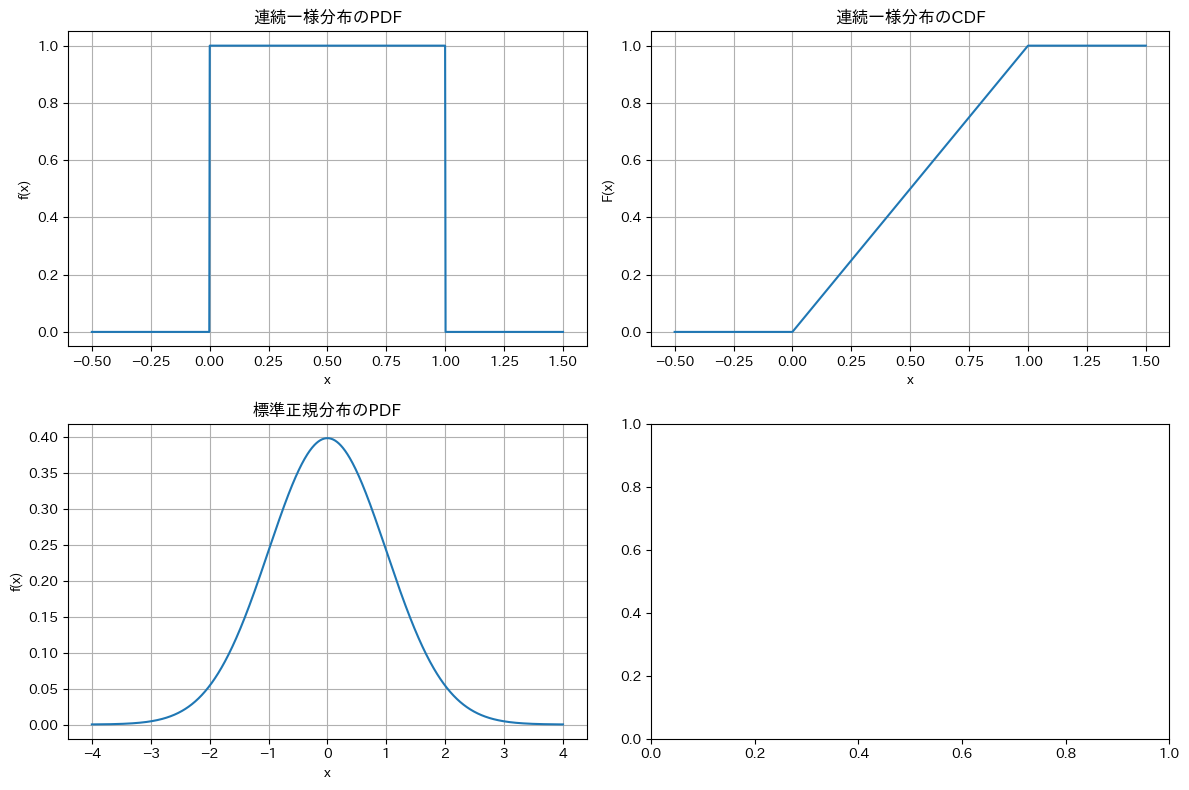

In [4]:
# CDFとPDFの関係を視覚化
import numpy as np
import matplotlib.pyplot as plt

# 連続一様分布の例
def uniform_pdf(x):
    return np.where((x >= 0) & (x <= 1), 1, 0)

def uniform_cdf(x):
    return np.where(x < 0, 0, np.where(x > 1, 1, x))

# 正規分布の例
def normal_pdf(x, mu=0, sigma=1):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def normal_cdf(x, mu=0, sigma=1):
    return 0.5 * (1 + np.math.erf((x - mu) / (sigma * np.sqrt(2))))

# グラフの描画
x = np.linspace(-0.5, 1.5, 1000)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 連続一様分布のPDF
axes[0, 0].plot(x, uniform_pdf(x))
axes[0, 0].set_title('連続一様分布のPDF')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].grid(True)

# 連続一様分布のCDF
axes[0, 1].plot(x, [uniform_cdf(xi) for xi in x])
axes[0, 1].set_title('連続一様分布のCDF')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('F(x)')
axes[0, 1].grid(True)

# 正規分布のPDF
x_normal = np.linspace(-4, 4, 1000)
axes[1, 0].plot(x_normal, [normal_pdf(xi) for xi in x_normal])
axes[1, 0].set_title('標準正規分布のPDF')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].grid(True)

# 正規分布のCDF
# axes[1, 1].plot(x_normal, [normal_cdf(xi) for xi in x_normal])
# axes[1, 1].set_title('標準正規分布のCDF')
# axes[1, 1].set_xlabel('x')
# axes[1, 1].set_ylabel('F(x)')
# axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### CDFの実用的な意義

累積分布関数（CDF: Cumulative Distribution Function）がもつ実際の「使いみち」の代表例について

#### 1. **確率の計算に使える**

CDFを使うと、「確率変数$X$が、ある区間$[a,b]$の間におさまる確率」が簡単に求められる。この確率は、次のように計算できる：

$$
P(a \leq X \leq b) = F_X(b) - F_X(a)
$$

たとえば、テストの点数$X$が70点以上80点以下になる確率を知りたいときは、「80点以下の確率」から「70点以下の確率」を引けばよい。

#### 2. **分位数（ぶんいすう）がわかる**

分位数とは、「全体を並べたときに、ちょうど$p$（例: 0.25、0.5など）の位置にあたる値」のことである。

- 例：中央値（ちゅうおうち）は、全体のちょうど真ん中（$p=0.5$の位置）の値である。
- CDFを使うと、「$F_X(x_p)=p$を満たす$x_p$」が$p$分位数である。

#### 3. **確率変数の変換に役立つ**

**確率変数（かくりつへんすう）** とは、「サイコロの目」や「テストの点数」のように、偶然によって決まる値のことである。  
この確率変数$X$が、別の形（例えば$Y=aX+b$のような新しい変数$Y$）に変換されたとき、CDFを使うと、新しい$Y$の分布を求める手がかりとなる。

- 例：温度$X$（摂氏）が華氏$Y$となる場合にも、CDFを使って確率の出し方を変換できる。

#### 4. **確率分布の特徴を比較しやすい**

CDFをグラフにすると、「分布の形」や「特徴」を分かりやすく比べられる。

- 例えば、２種類のテストの点数分布をCDFグラフで比べると、どちらが高得点に偏っているか、極端な値（裾：すそ）がどれだけ多いかが一目でわかる。

---

### まとめ

- **累積分布関数（CDF）** は、「確率変数がある値以下である確率」を表す関数である。サイコロの目やテストの点数、といったあらゆる確率変数に使える。

- **確率密度関数（PDF）** は、「どの点付近がどれだけ出やすいか」を示す関数である。これは特に、身長や体重などの連続的なデータに使われる。

- **CDFとPDFの関係** は、「PDFはCDFの傾き（導関数）」であり、「CDFはPDFを左から積み上げた合計（積分）」である。

- **CDFの実用的な使い道** としては、「確率の計算」「分位数の計算（中央値などを含む）」「異なる変数への変換」や「分布同士の比較」などが挙げられる。

---

#### 用語補足

- **分位数**：並べたときのある割合にあたる値。たとえば25%分位数（第一四分位数）、50%分位数（中央値）、75%分位数（第三四分位数）などがある。
- **裾（すそ）**：「裾が重い」とは、極端に大きな値・小さな値が他より多く出る分布のこと。
- **変換**：元の数字を計算式などで新しい形にすること。ただし、確率分布の形も変わるため注意が必要で、その際にCDFが活躍する。

---